In [1]:
# first we will import all the libreary which we are going to use in our model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Now lets import our data set using pandas 
a=pd.read_csv(r"C:\Users\arpitshrivastav.vc\Downloads\bankloan.csv")
a.head(5)

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
#lets try to understand our data set 
a.describe()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
# we have to check for the null values in our dataset
a.isnull().sum() # as we can see we do not have any null value in the dataset

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

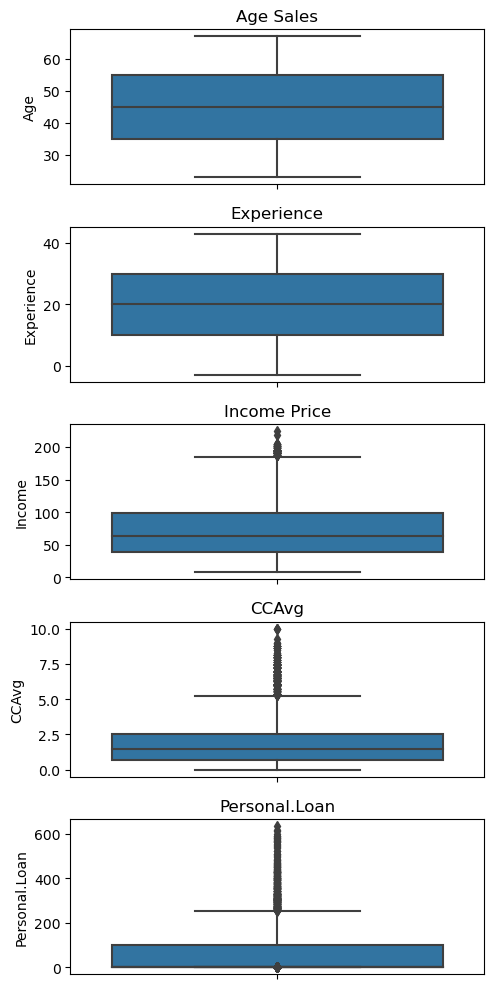

In [5]:
# now lets check for the outliers using boxplot

# Create subplots
fig, axes = plt.subplots(5, 1, figsize=(5, 10))

# Plot each boxplot
sns.boxplot(y=a["Age"], ax=axes[0])
axes[0].set_title("Age Sales")

sns.boxplot(y=a["Experience"], ax=axes[1])
axes[1].set_title("Experience")

sns.boxplot(y=a["Income"], ax=axes[2])
axes[2].set_title("Income Price")

sns.boxplot(y=a["CCAvg"], ax=axes[3])
axes[3].set_title("CCAvg")

sns.boxplot(y=a["Mortgage"], ax=axes[4])
axes[4].set_title("Mortgage")

sns.boxplot(y=a["Personal.Loan"], ax=axes[4])
axes[4].set_title("Personal.Loan")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# as we can see "weekly_sales" and "unemployment" column has some outliers

186.5


<Axes: ylabel='Income'>

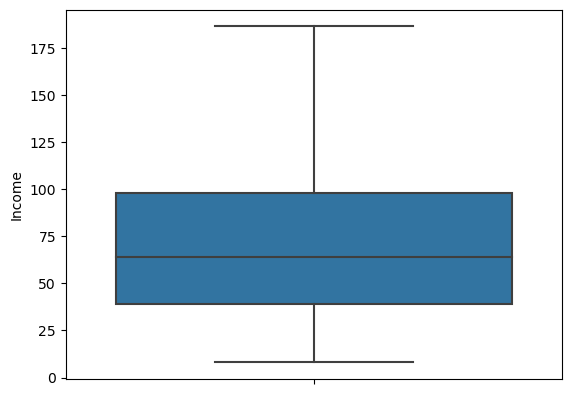

In [6]:
# from this box plot we can see income, CCAverage and personalloan has outlier, we will remove these by usin IQR
Q1,Q3=a["Income"].quantile([.25,.75])
IQR=Q3-Q1
LL=Q1-1.5*(IQR) # LowerLimit
UL=Q3+1.5*(IQR) # UpperLimit

print(UL)

# now we will replace all the outliers in Income with the UpperLimit
a["Income"]=np.where(a["Income"]>UL,UL,a["Income"])
sns.boxplot(y=a["Income"]) # as we can see the outlier are removed

5.2


<Axes: ylabel='CCAvg'>

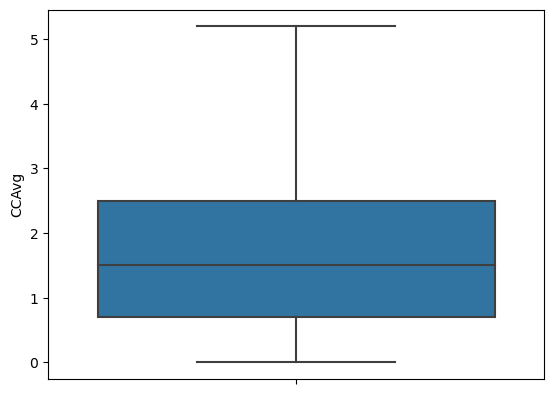

In [7]:
# Now we will remove the outliers for CCAvg
Q1,Q3=a["CCAvg"].quantile([.25,.75])
IQR=Q3-Q1
LL=Q1-1.5*(IQR) # LowerLimit
UL=Q3+1.5*(IQR) # UpperLimit

print(UL)

# now we will replace all the outliers in CCAvg with the UpperLimit
a["CCAvg"]=np.where(a["CCAvg"]>UL,UL,a["CCAvg"])
sns.boxplot(y=a["CCAvg"]) # as we can see the outlier are removed

In [11]:
# now lets see our data and do some analysis
a.head(5)

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49.0,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34.0,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11.0,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100.0,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45.0,91330,4,1.0,2,0,0,0,0,0,1


In [19]:
# Now lets split our data 
x=a[["Age","Experience","Income","Family","CCAvg","Education","Mortgage","Personal.Loan","Securities.Account","CD.Account","Online"]]
y=a[["CreditCard"]]

# now we will divide our data into train test to train or test our model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) # this means 20% of data in test and the remain in train

print(x_train.shape)
print(y_train.shape)

(4000, 11)
(4000, 1)


In [22]:
# now lets import our decision tree model
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

# now lets fit our data into the model to train it 
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
# now lets predict the values from our model
dtc.predict(x_test)

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [24]:
# Now lets check the accuracy score of our model
dtc.score(x_test,y_test)
# as we can see our model is 63% accurate in predicting the values.

0.639